Sentiment Analysis in large texts utilizing R
----

In [1]:
# The sentiments dataset
library(tidytext)
sentiments

word,sentiment,lexicon,score
abacus,trust,nrc,NA
abandon,fear,nrc,NA
abandon,negative,nrc,NA
abandon,sadness,nrc,NA
abandoned,anger,nrc,NA
abandoned,fear,nrc,NA
abandoned,negative,nrc,NA
abandoned,sadness,nrc,NA
abandonment,anger,nrc,NA
abandonment,fear,nrc,NA


Three general perpose lexicons based upon unigrams:
----
- AFINN from Finn Arup Nielsen,
- bing from Bing Liu and collaborators, and
- nrc from Said Mohammad and Peter Turney

As a note, this is pretty wild that this technique for assessing sentiment is available. It's a difficult process and usually takes a dictionary bootstrapping method with some supervised labels for sentiment base words to be used for extrapolation (i.e., using synonyms of a word to create a hierarchical sentiment map based on the distance of that word from the base sentiment, or rather, how many layers of synonyms have to be looked into before that word appears).

R is really magical in that you're really standing on the shoulders of researchers, rather than requiring a wholesome understanding of the underlying algorithms.

In [2]:
get_sentiments("afinn")
get_sentiments("bing")
get_sentiments("nrc")

word,score
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3
abhors,-3


word,sentiment
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative


word,sentiment
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger
abandonment,fear


In [4]:
# Sentiment analysis with inner join
library(janeaustenr)
library(dplyr, warn.conflicts = FALSE)
library(stringr)

tidy_books = austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(),
           chapter    = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                     ignore_case= TRUE)))) %>%
    ungroup() %>%
    unnest_tokens(word, text)

The text is now in a "Tidy" format, with one word per row, and is prepared for the sentiment analysis.
----
Next, we'll find the most common words with sentiment close to "joy" in Jane Austen's "Emma" utilizing nrc sentiments.

In [5]:
nrcjoy = get_sentiments("nrc") %>%
    filter(sentiment == "joy")

tidy_books %>%
    filter(book == "Emma") %>%
    inner_join(nrcjoy) %>%
    count(word, sort = T)

Joining, by = "word"


word,n
good,359
young,192
friend,166
hope,143
happy,125
love,117
deal,92
found,92
present,89
kind,82


We can examine how sentiment changes throughout each novel. 
----
First, we'll find a sentiment score for each word using the Bing lexicon and inner_join(). Next, we count up how many positive and negative words there are in defined sections of each book. We define an index here to keep track of where we are in the nerrative; this index (using integer division) counts up sections of 80 lines of text. small sections of text may not have enough words in them to get a good estimate of sentiment while really large sections can wash out narrative structure. For these books using 80 lines works well, but this can vary depending on individual texts, how long the lines were to start with, etc. We then use spread() so that we have negative and positive sentiment in separate columns, and lastly calculate a net sentiment (positive - negative):

In [6]:
library(tidyr)

janeaustensentiment = tidy_books %>% 
    inner_join(get_sentiments("bing")) %>%
    count(book, index = linenumber %/% 80, sentiment) %>%
    spread(sentiment, n, fill = 0) %>%
    mutate(sentiment = positive - negative)

Joining, by = "word"


Now we can plot these sentiment scores across the plot trajectory of each novel.
----
Notice that we are plotting against the index on the x-axis that keeps track of the narrative time in sections of text.

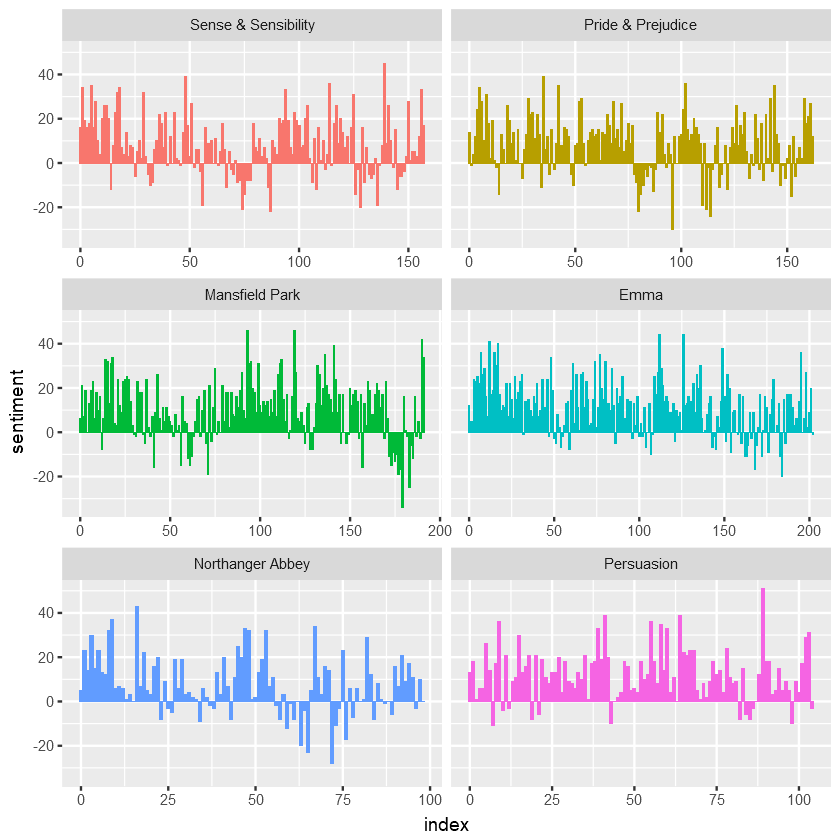

In [7]:
library(ggplot2)

ggplot(janeaustensentiment, aes(index, sentiment, fill = book)) +
    geom_col(show.legend = FALSE) + 
    facet_wrap(~book, ncol = 2, scales = "free_x")

Comparing the three sentiment dictionaries:
----
With several options for sentiment lexicons, you might want some more information on which one is appropriate for your purposes. Let's use all three sentiment lexicons and examine how the sentiment changes across the narrative arc of Pride and Prejudice.

In [8]:
pride_prejudice = tidy_books %>%
    filter(book == "Pride & Prejudice")

pride_prejudice

book,linenumber,chapter,word
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen
Pride & Prejudice,7,1,chapter
Pride & Prejudice,7,1,1
Pride & Prejudice,10,1,it
Pride & Prejudice,10,1,is


Let's again use integer division (%/%) to define larger sections of text that span multiple lines, and we can use the same pattern with count(), spread(), and mutate() to find the net sentiment in each of these sections of text.

In [10]:
afinn = pride_prejudice %>%
    inner_join(get_sentiments("afinn")) %>%
    group_by(index = linenumber %/% 80) %>%
    summarise(sentiment = sum(score)) %>%
    mutate(method = "AFINN")

bing_and_nrc = bind_rows(pride_prejudice %>%
                            inner_join(get_sentiments("bing")) %>%
                            mutate(method = "Bing et al."),
                         pride_prejudice %>%
                            inner_join(get_sentiments("nrc") %>%
                            filter(sentiment %in% c("positive", 
                                                    "negative"))) %>%
                            mutate(method = "NRC")) %>%
    count(method, index = linenumber %/% 80, sentiment) %>%
    spread(sentiment, n, fill = 0) %>%
    mutate(sentiment = positive - negative)

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


We now have an estimate of the net sentiment (positive - negative) in each chunk of the novel text for each sentiment lexicon. Let's bind them together and visualize them.

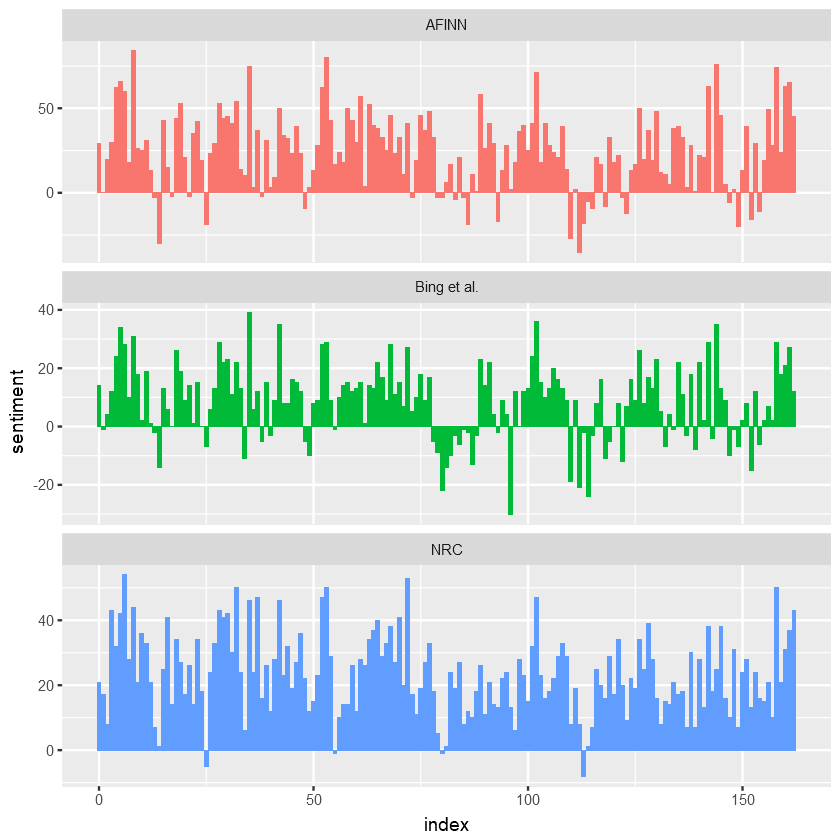

In [11]:
bind_rows(afinn, bing_and_nrc) %>%
    ggplot(aes(index, sentiment, fill = method)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~method, ncol = 1, scales = "free_y")

The NRC results are shifted higher relative to the other two, labeling the text more positively, but detects similar relative changes in the text. We find similar differences between the methods when looking at other novels; the NRC sentiment is high, the AFINN sentiment has more variance, the Bing et al. sentiment appears to find longer stretches of similar text, but all three agree roughly on the overall trends in the sentiment through a narrative arc.

Why is, for example, the result for the NRC lexicon biased so high in sentiment compared to the Bing et al. result? Let's look briefly at how many positive and negative words are in each of these lexicons.

In [12]:
get_sentiments("nrc") %>%
    filter(sentiment %in% c("positive", "negative")) %>%
    count(sentiment)

get_sentiments("bing") %>%
    count(sentiment)

sentiment,n
negative,3324
positive,2312


sentiment,n
negative,4782
positive,2006


The Most Common positive and negative words
----
One advantage of having the data frame with both sentiment and word is that we can analyze word counts that contribute to each sentiment. By implementing count() here with arguments of both word and sentiment, we find out how much each word contributed to each sentiment.

In [18]:
bing_word_counts = tidy_books %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    ungroup()

bing_word_counts

Joining, by = "word"


word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639
enough,positive,613
happy,positive,534
love,positive,495
pleasure,positive,462


This can be shown visually, and we can pipe straight into ggplot2.

Selecting by n


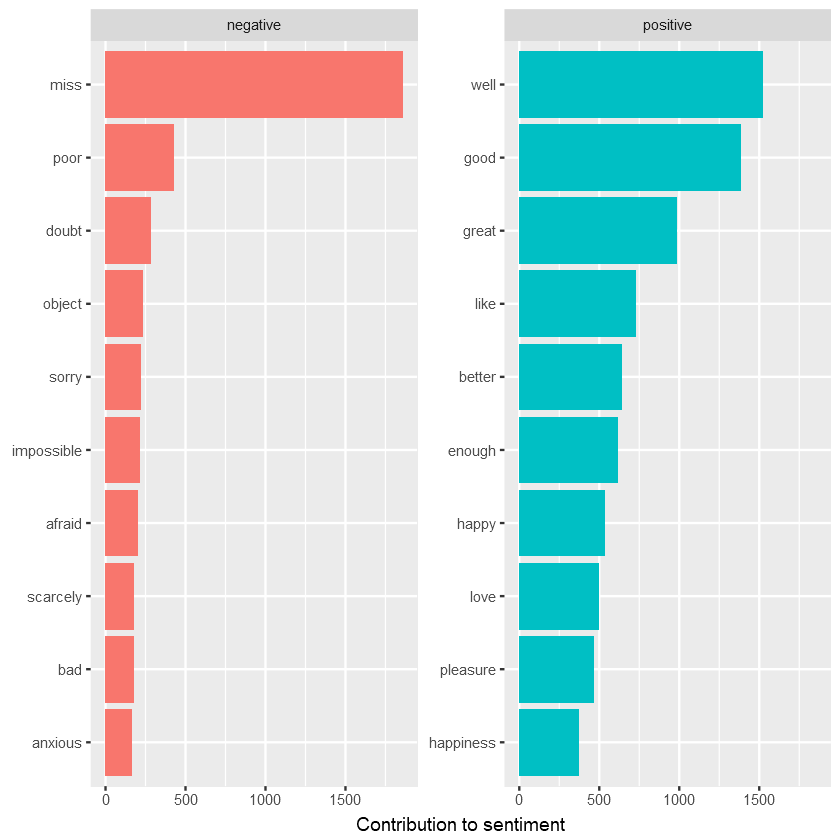

In [20]:
bing_word_counts %>%
    group_by(sentiment) %>%
    top_n(10) %>%
    ungroup() %>%
    mutate(word=reorder(word,n)) %>%
    ggplot(aes(word, n, fill=sentiment)) +
    geom_col(show.legend=F) + 
    facet_wrap(~sentiment, scales="free_y") +
    labs(y="Contribution to sentiment", x = NULL) +
    coord_flip()

The issue with the word "Miss" is that it's not only a verb, but a title "Miss, Missus".

Let's add it to a list of stop words.

In [21]:
custom_stop_words = bind_rows(data_frame(word = c("miss"),
                                        lexicon = c("custom")), stop_words)

custom_stop_words

word,lexicon
miss,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART


Wordclouds
----
Let's do the sentiment analysis to tag positive and negative words using an inner join, then find the most common positive and negative words. Until the step where we need to send the data to comparison.cloud(), this can all be done with joins, piping, and dplyr because our data is in tidy format.

Loading required package: RColorBrewer
Joining, by = "word"


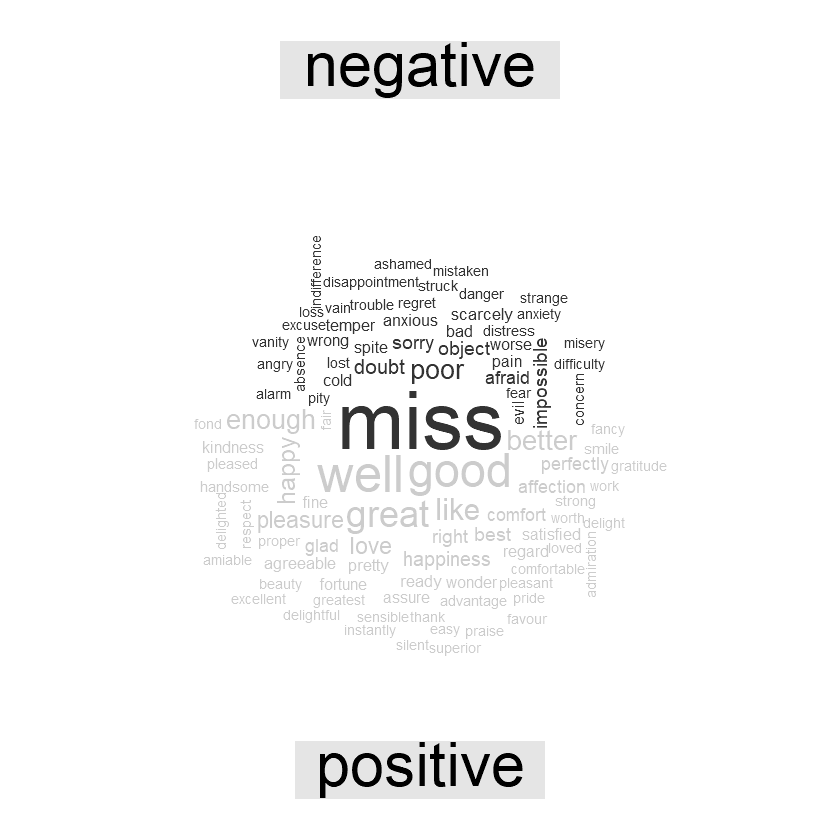

In [26]:
library(reshape2)
library(wordcloud)

tidy_books %>%
    inner_join(get_sentiments("bing")) %>%
    count(word, sentiment, sort = TRUE) %>%
    acast(word~sentiment, value.var = "n", fill = 0) %>%
    comparison.cloud(colors = c("gray20", "gray80"), max.words = 100)

We can use tidy text analysis to ask questions such as what are the most negative chapters in each of Jane Austen's novels?
----
First, let's get the list of negative words from the Bing lexicon. Second, let's make a data frame of how many words are in each chapter so we can normalize for the length of the chapters. Then, let's find the number of negative words in each chapter and divide by the total words in each chapter. For each book, which chapter has the highest proportion of negative words?

In [27]:
bingnegative = get_sentiments("bing") %>%
    filter(sentiment == "negative")

wordcounts = tidy_books %>%
    group_by(book, chapter) %>%
    summarize(words = n())

tidy_books %>%
    semi_join(bingnegative) %>%
    group_by(book, chapter) %>%
    summarize(negativewords = n()) %>%
    left_join(wordcounts, by = c("book", "chapter")) %>%
    mutate(ratio = negativewords/words) %>%
    filter(chapter != 0) %>%
    top_n(1) %>%
    ungroup()

Joining, by = "word"
Selecting by ratio


book,chapter,negativewords,words,ratio
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101


These are the chapters with the most sad words in each book, normalized for number of words in the chapter.
What is happening in these chapters? In Chapter 43 of Sense and Sensibility Marianne is seriously ill, near
death, and in Chapter 34 of Pride and Prejudice Mr. Darcy proposes for the first time (so badly!). Chapter 46
of Mansfield Park is almost the end, when everyone learns of Henry’s scandalous adultery, Chapter 15
of Emma is when horrifying Mr. Elton proposes, and in Chapter 21 of Northanger Abbey Catherine is deep in
her Gothic faux fantasy of murder, etc. Chapter 4 of Persuasion is when the reader gets the full flashback of
Anne refusing Captain Wentworth and how sad she was and what a terrible mistake she realized it to be. 